In [1]:
import xarray as xr
import s3fs
xr.set_options(display_style='html')
import intake
import cftime
import matplotlib.pyplot as plt
import numpy as np
from netCDF4 import Dataset
from matplotlib.colors import LogNorm
import cartopy.crs as ccrs
import cartopy
import matplotlib.path as mpath
from functions import compute_ivt,to_nc
from matplotlib import rc,animation
from matplotlib.animation import FuncAnimation
from IPython import display

In [2]:
cat_url = "https://storage.googleapis.com/cmip6/pangeo-cmip6.json"
col = intake.open_esm_datastore(cat_url)
col

,unique
activity_id,18
institution_id,36
source_id,88
experiment_id,170
member_id,657
table_id,37
variable_id,700
grid_label,10
zstore,514818
dcpp_init_year,60


In [3]:
cat = col.search(source_id=['NorESM2-LM'], experiment_id=['ssp245'], table_id=['day'], variable_id=['od550aer','clt','hus','va','tas'], member_id=['r1i1p1f1'])
cat.df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NCC,NorESM2-LM,ssp245,r1i1p1f1,day,va,gn,gs://cmip6/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ss...,NaN,20191108
1,ScenarioMIP,NCC,NorESM2-LM,ssp245,r1i1p1f1,day,tas,gn,gs://cmip6/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ss...,NaN,20191108
2,ScenarioMIP,NCC,NorESM2-LM,ssp245,r1i1p1f1,day,hus,gn,gs://cmip6/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ss...,NaN,20191108
3,ScenarioMIP,NCC,NorESM2-LM,ssp245,r1i1p1f1,day,clt,gn,gs://cmip6/CMIP6/ScenarioMIP/NCC/NorESM2-LM/ss...,NaN,20191108


In [4]:
dset_dict = cat.to_dataset_dict(zarr_kwargs={'use_cftime':True})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [5]:
dataset_list = list(dset_dict.keys())

In [8]:
dset = dset_dict[dataset_list[0]]
#dset = dset.sel(member_id='r1i1p1f1',time=slice("2000-01-01", "2014-12-31"))
dset

<xarray.Dataset>
Dimensions:    (member_id: 1, time: 31390, lat: 96, lon: 144, bnds: 2, plev: 8)
Coordinates:
  * lat        (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
    lat_bnds   (lat, bnds) float64 dask.array<chunksize=(96, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    lon_bnds   (lon, bnds) float64 dask.array<chunksize=(144, 2), meta=np.ndarray>
  * time       (time) object 2015-01-01 12:00:00 ... 2100-12-31 12:00:00
    time_bnds  (time, bnds) object dask.array<chunksize=(15695, 2), meta=np.ndarray>
  * member_id  (member_id) <U8 'r1i1p1f1'
  * plev       (plev) float64 1e+05 8.5e+04 7e+04 5e+04 ... 1e+04 5e+03 1e+03
    height     float64 ...
Dimensions without coordinates: bnds
Data variables:
    clt        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1215, 96, 144), meta=np.ndarray>
    hus        (member_id, time, plev, lat, lon) float32 dask.array<chunksize=(1, 164, 8, 96, 144), meta=np.ndarray>
    tas        (member_id, time, lat, lon) float32 dask.array<chunksize=(1, 1521, 96, 144), meta=np.ndarray>
    va         (member_id, time, plev, lat, lon) float32 dask.array<chunksize=(1, 143, 8, 96, 144), meta=np.ndarray>
Attributes: (12/51)
    grid:                      finite-volume grid with 1.9x2.5 degree lat/lon...
    model_id:                  NorESM2-LM
    variant_label:             r1i1p1f1
    parent_mip_era:            CMIP6
    source:                    NorESM2-LM (2017): \naerosol: OsloAero\natmos:...
    sub_experiment:            none
    ...                        ...
    run_variant:               N/A
    further_info_url:          https://furtherinfo.es-doc.org/CMIP6.NCC.NorES...
    data_specs_version:        01.00.31
    realm:                     atmos
    product:                   model-output
    intake_esm_dataset_key:    ScenarioMIP.NCC.NorESM2-LM.ssp245.day.gn

In [9]:
# import AOD historical
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0",client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022/Remy/')

s3path = "s3://escience2022/Remy/od550aer_AERday_NorESM2-LM_historical_r1i1p1f1_gn_20000101-20091231.nc"
esacci = xr.open_dataset(s3.open(s3path))

In [10]:
esacci

<xarray.Dataset>
Dimensions:     (time: 3650, bnds: 2, lat: 96, lon: 144)
Coordinates:
  * time        (time) object 2000-01-01 12:00:00 ... 2009-12-31 12:00:00
  * lat         (lat) float64 -90.0 -88.11 -86.21 -84.32 ... 86.21 88.11 90.0
  * lon         (lon) float64 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    wavelength  float64 ...
Dimensions without coordinates: bnds
Data variables:
    time_bnds   (time, bnds) object ...
    lat_bnds    (lat, bnds) float64 ...
    lon_bnds    (lon, bnds) float64 ...
    od550aer    (time, lat, lon) float32 ...
Attributes: (12/49)
    Conventions:               CF-1.7 CMIP-6.2
    activity_id:               CMIP
    branch_method:             Hybrid-restart from year 1600-01-01 of piControl
    branch_time:               0.0
    branch_time_in_child:      0.0
    branch_time_in_parent:     430335.0
    ...                        ...
    title:                     NorESM2-LM output prepared for CMIP6
    variable_id:               od550aer
    variant_label:             r1i1p1f1
    license:                   CMIP6 model data produced by NCC is licensed u...
    cmor_version:              3.5.0
    tracking_id:               hdl:21.14100/3ce70ca9-d644-452d-8cec-b385c7a6a89d

In [15]:
s3.ls('escience2022/Remy/')

['escience2022/Remy/.keep',
 'escience2022/Remy/.wget-20221102193645.sh.status',
 'escience2022/Remy/.wget-20221102193729.sh.status',
 'escience2022/Remy/.wget-20221102193735.sh.status',
 'escience2022/Remy/.wget-20221102193742.sh.status',
 'escience2022/Remy/Era5',
 'escience2022/Remy/dl_era5_hus.py',
 'escience2022/Remy/dl_era5_wind.py',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_historical_r1i1p1f1_gn_19500101-19591231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_historical_r1i1p1f1_gn_19600101-19691231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_historical_r1i1p1f1_gn_19700101-19791231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_historical_r1i1p1f1_gn_19800101-19891231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_historical_r1i1p1f1_gn_19900101-19991231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_historical_r1i1p1f1_gn_20000101-20091231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_historical_r1i1p1f1_gn_20100101-20141231.nc',
 'escie

In [7]:
# import AOD ssp245
s3 = s3fs.S3FileSystem(key="K1CQ7M1DMTLUFK182APD", secret="3JuZAQm5I03jtpijCpHOdkAsJDNLNfZxBpM15Pi0",client_kwargs=dict(endpoint_url="https://rgw.met.no"))
s3.ls('escience2022/Remy/')

s3path = list(['escience2022/Remy/od550aer_AERday_NorESM2-LM_ssp245_r1i1p1f1_gn_20150101-20201231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_ssp245_r1i1p1f1_gn_20210101-20301231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_ssp245_r1i1p1f1_gn_20310101-20401231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_ssp245_r1i1p1f1_gn_20410101-20501231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_ssp245_r1i1p1f1_gn_20510101-20601231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_ssp245_r1i1p1f1_gn_20610101-20701231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_ssp245_r1i1p1f1_gn_20710101-20801231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_ssp245_r1i1p1f1_gn_20810101-20901231.nc',
 'escience2022/Remy/od550aer_AERday_NorESM2-LM_ssp245_r1i1p1f1_gn_20910101-21001231.nc'])

sopenlist=[s3.open(ss) for ss in s3path]

ssp245 = xr.open_mfdataset(sopenlist)

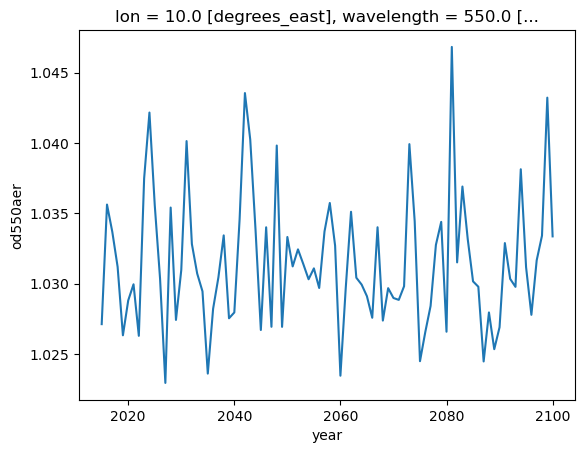

In [14]:
trend = ssp245.sel(lon = 11, lat = 80, method = 'nearest')
trend = trend.groupby('time.year').mean()  
trend['od550aer'].plot()